# Cloropleth Map BRL

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
# set the filepath and load in a shapefile
fp = "BRA_adm1.shp"
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,33,BRA,Brazil,2,Alagoas,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,33,BRA,Brazil,3,Amapá,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,33,BRA,Brazil,4,Amazonas,Estado,State,None,Amazone,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
4,33,BRA,Brazil,5,Bahia,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."


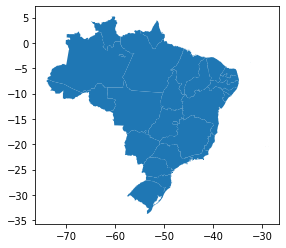

In [5]:
map_df.plot()

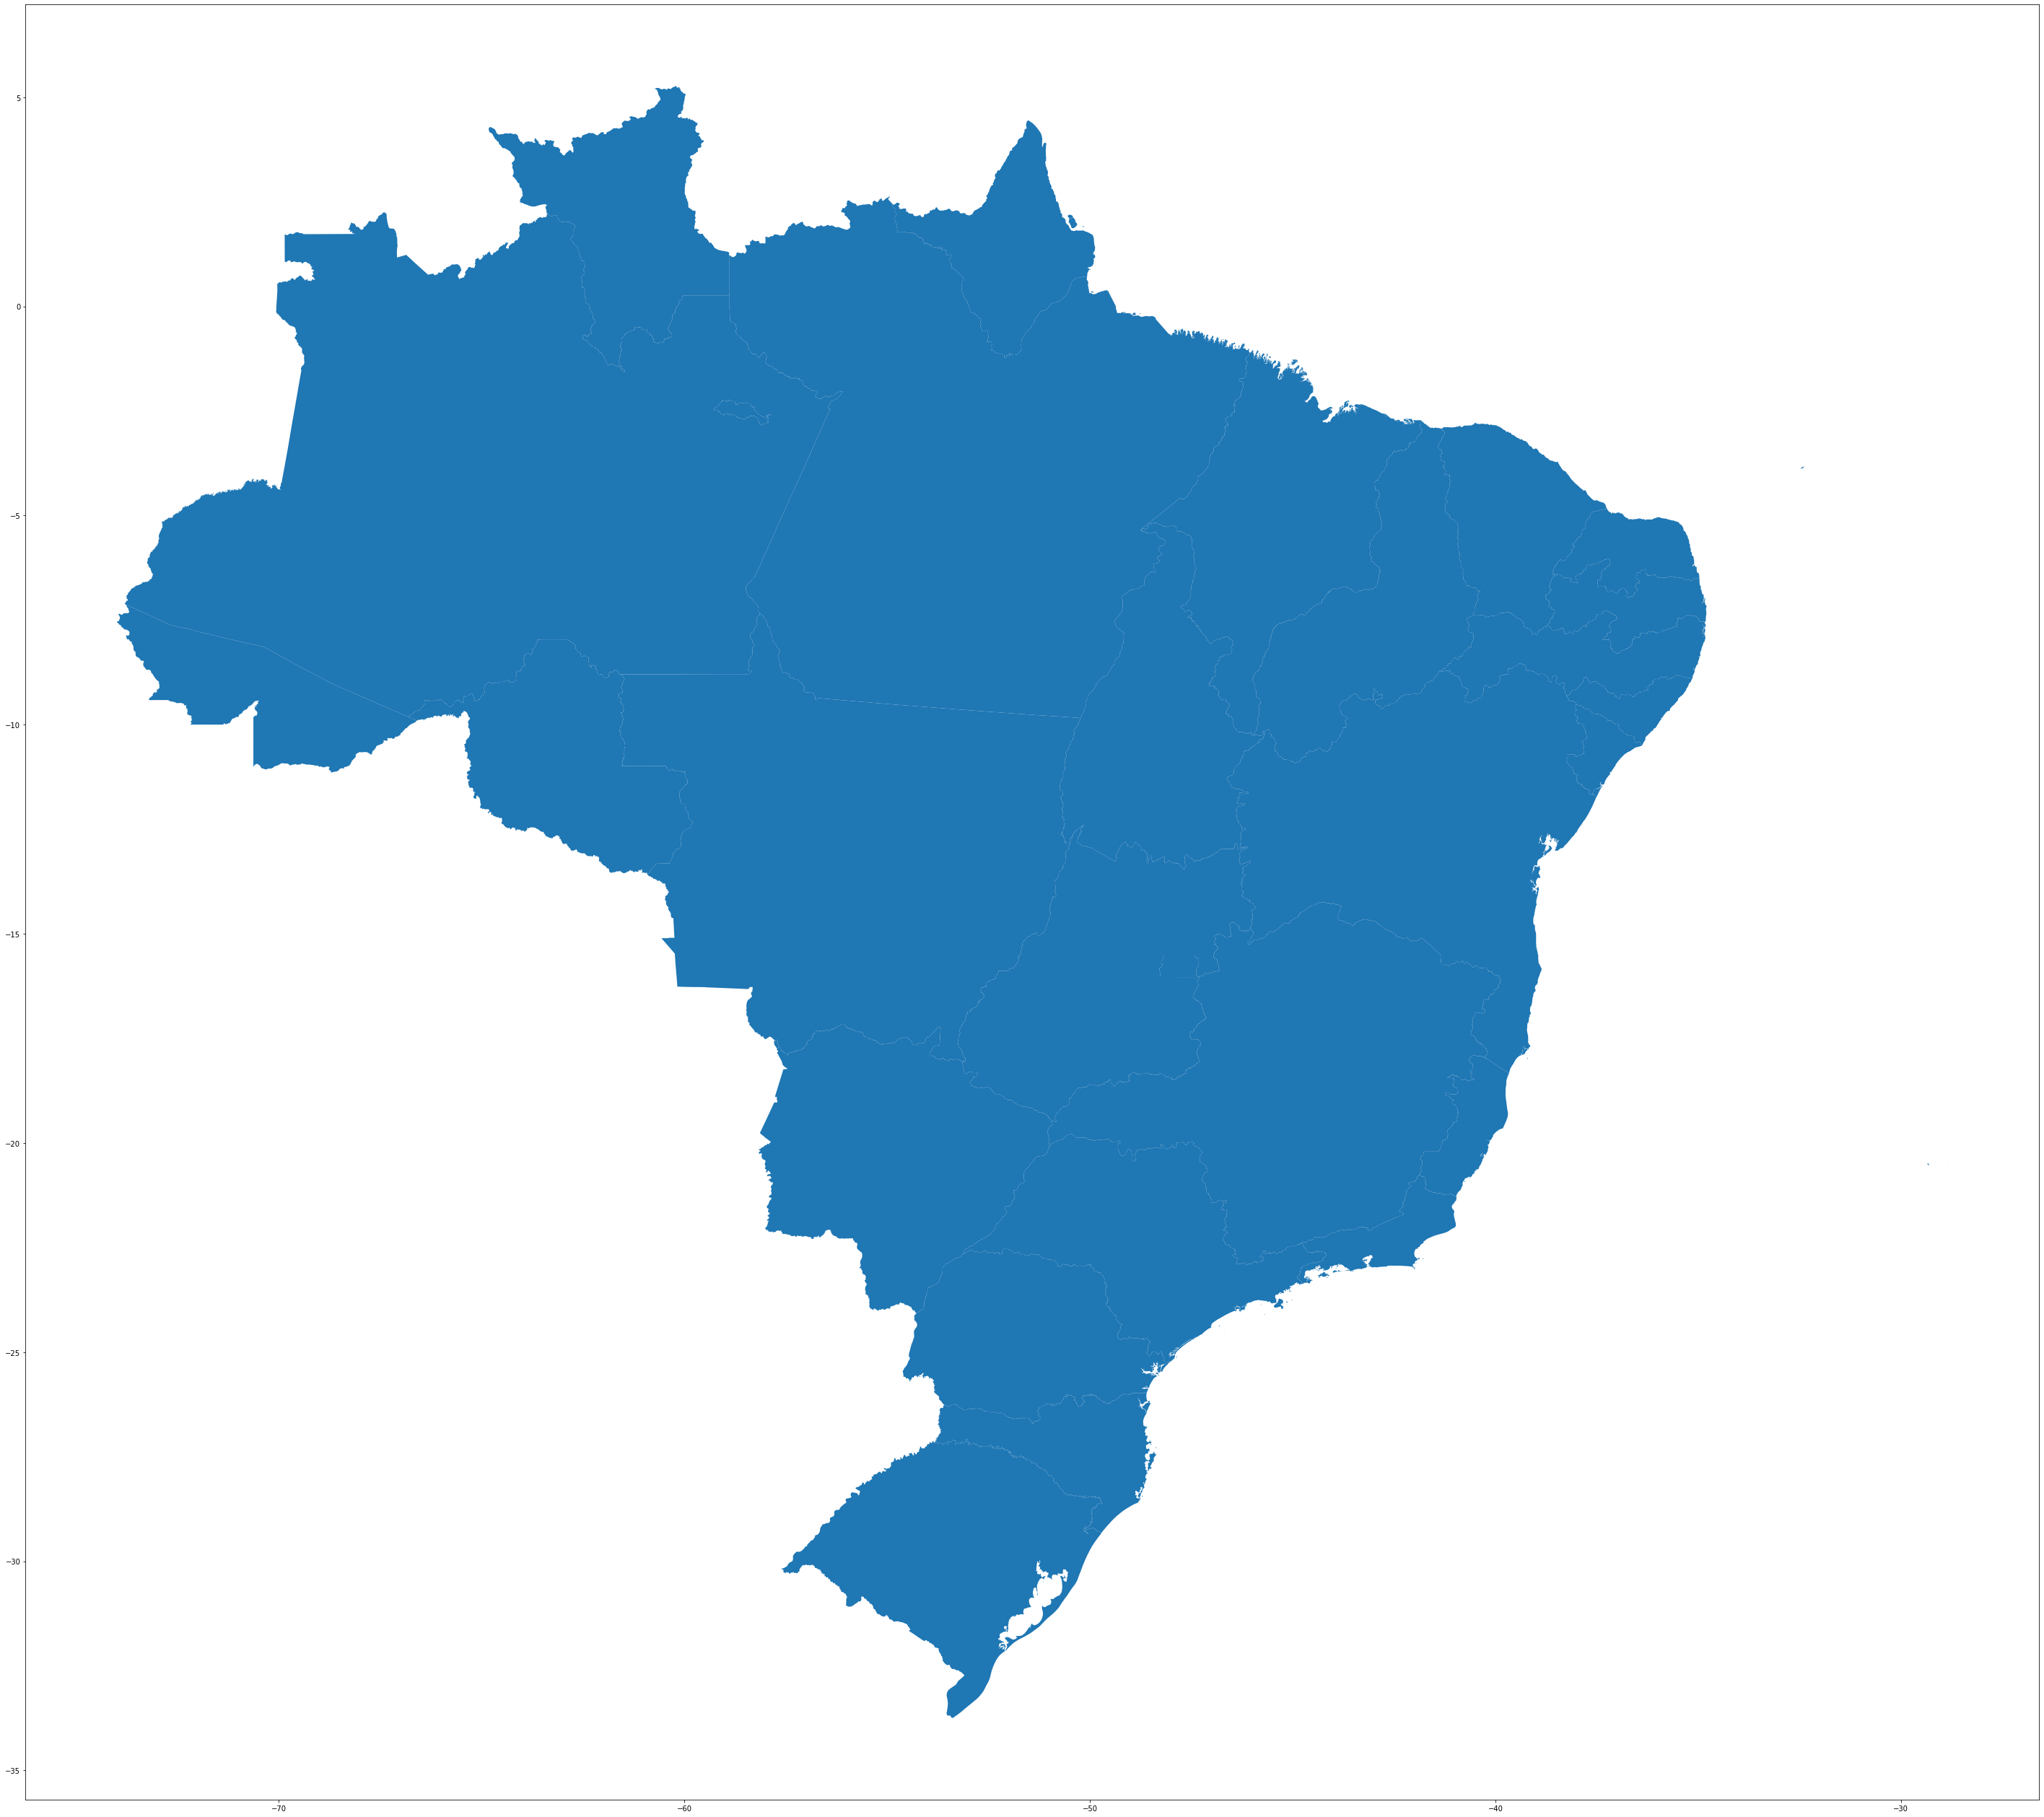

In [6]:
plt.rcParams['figure.figsize'] = [50, 70] #height, width
map_df.plot()

In [47]:
province = pd.read_csv("bra_info.csv", sep=";")
province.head()

,Name,Code,Capital,Area km2,Population 2019,Density per km2 2019,GDP R$ mm 2017,HDI 2017,Nº de CPFs B3,GDP per Capita
0,Acre,AC,Rio Branco,164124,881935,5.37,14271,719,3641,"0,01618"
1,Alagoas,AL,Maceió,27843,3337357,119.86,52843,683,14040,"0,01583"
2,Amazonas,AM,Manaus,1559168,4144597,2.66,15480,733,18400,"0,00373"
3,Amapá,AP,Macapá,142471,845731,5.94,93204,740,2783,"0,11021"
4,Bahia,BA,Salvador,564723,14873064,26.34,268661,714,84216,"0,01806"


In [49]:
# join the geodataframe with the csv dataframe
merged = map_df.merge(province, how='left', left_on="NAME_1", right_on="Name")
merged = merged[['Name', 'Code', 'geometry', 'Population 2019', 'Area km2', 'Density per km2 2019', \
                'GDP R$ mm 2017', 'Nº de CPFs B3', 'GDP per Capita']]
merged

,Name,Code,geometry,Population 2019,Area km2,Density per km2 2019,GDP R$ mm 2017,Nº de CPFs B3,GDP per Capita
0,Acre,AC,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",881935,164124,5.37,14271,3641,"0,01618"
1,Alagoas,AL,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...",3337357,27843,119.86,52843,14040,"0,01583"
2,Amapá,AP,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...",845731,142471,5.94,93204,2783,"0,11021"
3,Amazonas,AM,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997...",4144597,1559168,2.66,15480,18400,"0,00373"
4,Bahia,BA,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",14873064,564723,26.34,268661,84216,"0,01806"
5,Ceará,CE,"MULTIPOLYGON (((-38.47542 -3.70097, -38.47542 ...",9132078,148895,61.33,147890,50314,"0,01619"
6,Distrito Federal,DF,"POLYGON ((-48.03603 -15.50022, -47.77200 -15.5...",3015268,5761,523.41,244683,93611,"0,08115"
7,Espírito Santo,ES,"MULTIPOLYGON (((-40.88403 -21.16125, -40.88403...",4018650,46074,87.22,113352,54654,"0,02821"
8,Goiás,GO,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4...",7018354,340126,20.63,191899,62659,"0,02734"
9,Maranhão,MA,"MULTIPOLYGON (((-42.12375 -2.80069, -42.12375 ...",7075181,329642,21.46,89524,19468,"0,01265"


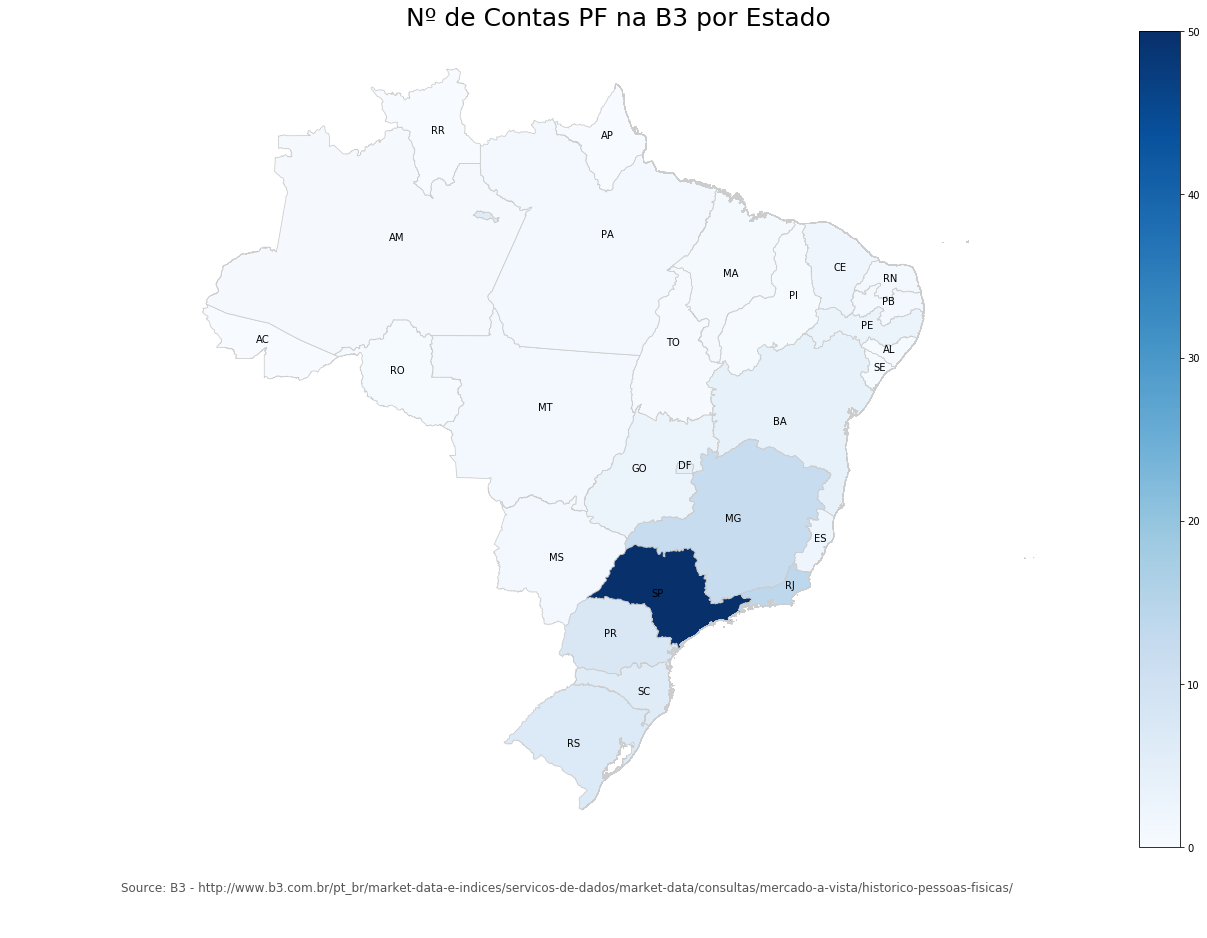

In [44]:
# set the value column that will be visualised
variable = 'Nº de CPFs B3'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(23, 15))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('Nº de Contas na B3 por Estado', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: B3 - http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/consultas/mercado-a-vista/historico-pessoas-fisicas/', xy=(0.1, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(s=row['Code'], xy=row['coords'],horizontalalignment='center')

In [45]:
fig.savefig('mapb3brl.png', dpi=300)

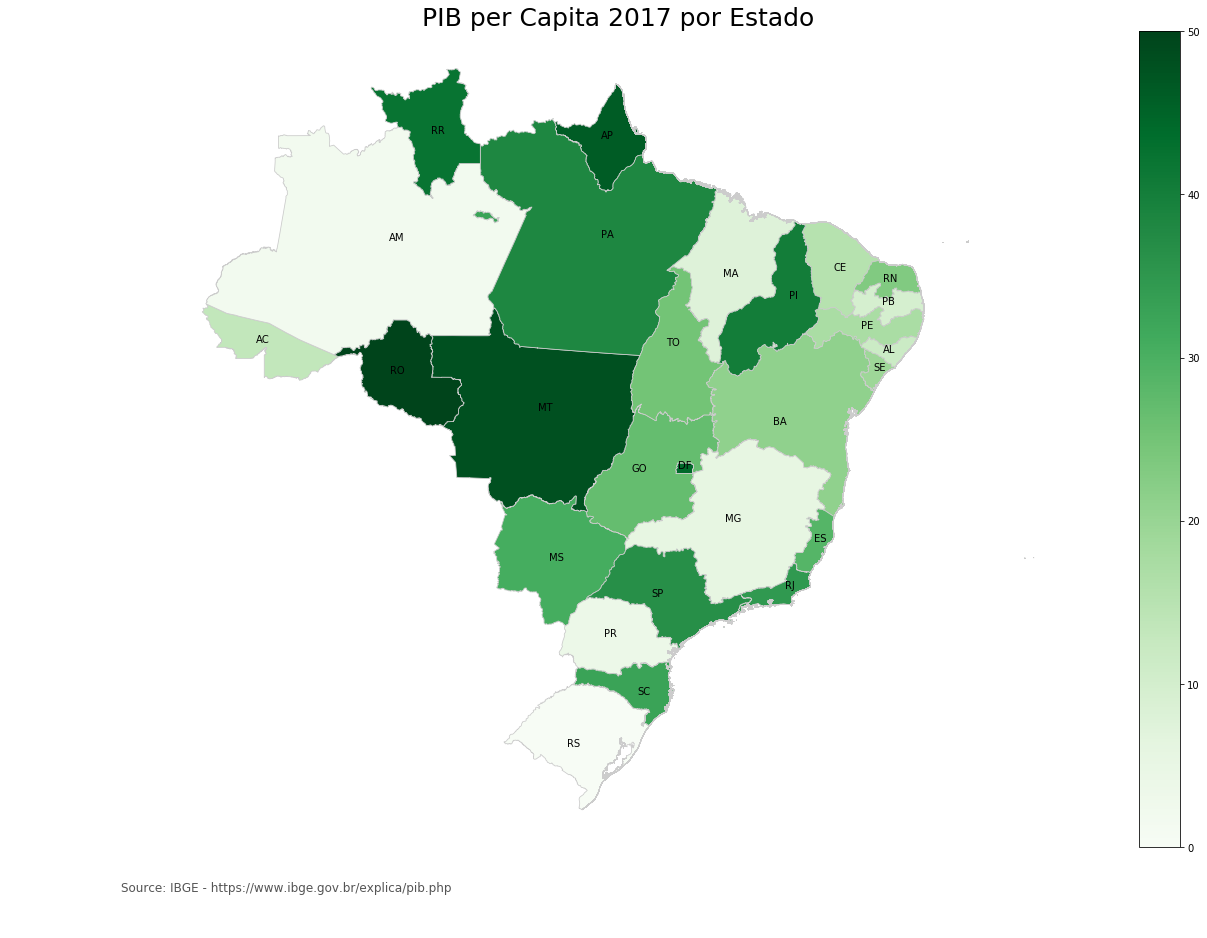

In [50]:
# set the value column that will be visualised
variable = 'GDP per Capita'
# set the range for the choropleth values
vmin, vmax = 0, 50
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(23, 15))
# remove the axis
ax.axis('off')
# add a title and annotation
ax.set_title('PIB per Capita 2017 por Estado', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: IBGE - https://www.ibge.gov.br/explica/pib.php', xy=(0.1, .05), xycoords='figure fraction', fontsize=12, color='#555555')
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it
# add the colorbar to the figure
fig.colorbar(sm)
# create map
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')
# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(s=row['Code'], xy=row['coords'],horizontalalignment='center')

In [51]:
fig.savefig('mapgdpbrl.png', dpi=300)